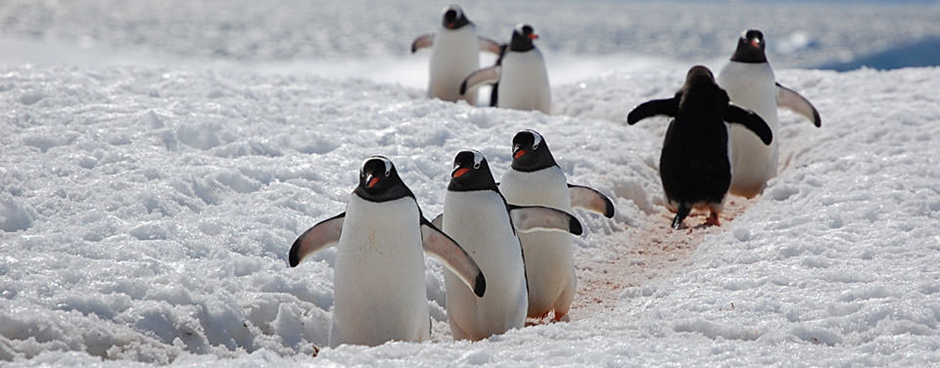

In [1]:
#Basic
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Classification
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
%matplotlib inline

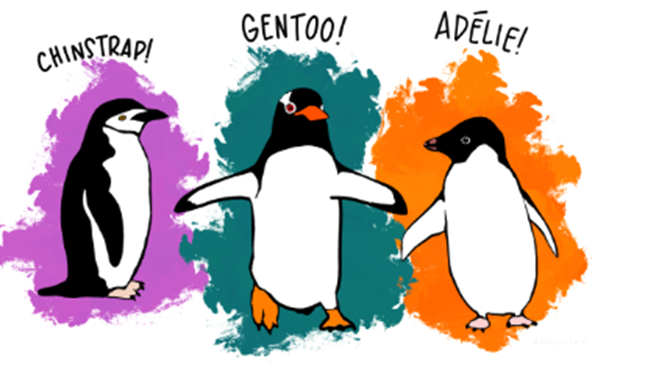

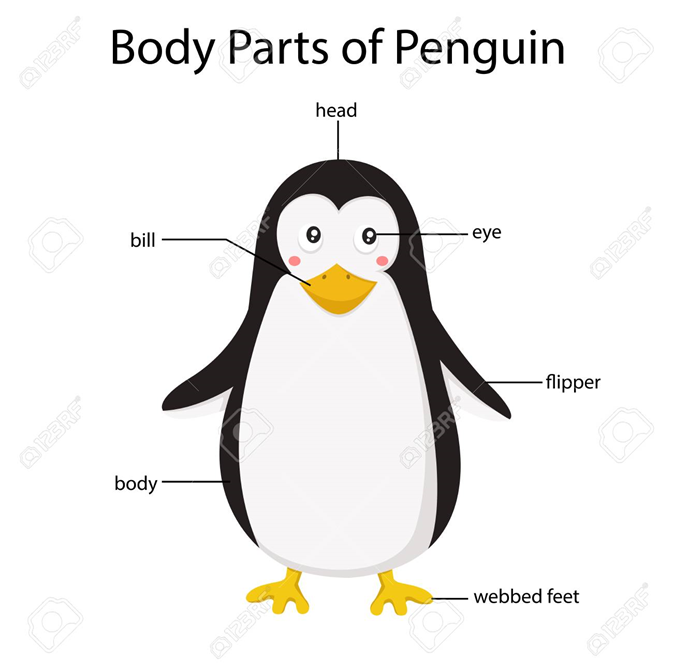

### What is culmen?

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

In [2]:
df = pd.read_csv(r"D:\Group Assignment\penguins_lter.csv")

In [3]:
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


### Verifying the Dataset

In [4]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 344
Number of Columns: 17


In [5]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [6]:
df.cov()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1634.600990,-52.009045,-1.779071,23.151258,-227.623862,0.154585,-15.612673
Culmen Length (mm),-52.009045,29.807054,-2.534234,50.375765,2605.591912,-0.179601,0.818786
Culmen Depth (mm),-1.779071,-2.534234,3.899808,-16.212950,-747.370093,0.661464,0.675877
Flipper Length (mm),23.151258,50.375765,-16.212950,197.731792,9824.416062,-3.912035,-4.165074
Body Mass (g),-227.623862,2605.591912,-747.370093,9824.416062,643131.077327,-238.960788,-239.166514
Delta 15 N (o/oo),0.154585,-0.179601,0.661464,-3.912035,-238.960788,0.304451,0.248172
Delta 13 C (o/oo),-15.612673,0.818786,0.675877,-4.165074,-239.166514,0.248172,0.630374


In [7]:
df.corr()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.236356,-0.022352,0.040849,-0.007042,0.006952,-0.488690
Culmen Length (mm),-0.236356,1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
Culmen Depth (mm),-0.022352,-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
Flipper Length (mm),0.040849,0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
Body Mass (g),-0.007042,0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
Delta 15 N (o/oo),0.006952,-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),-0.488690,0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


In [8]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

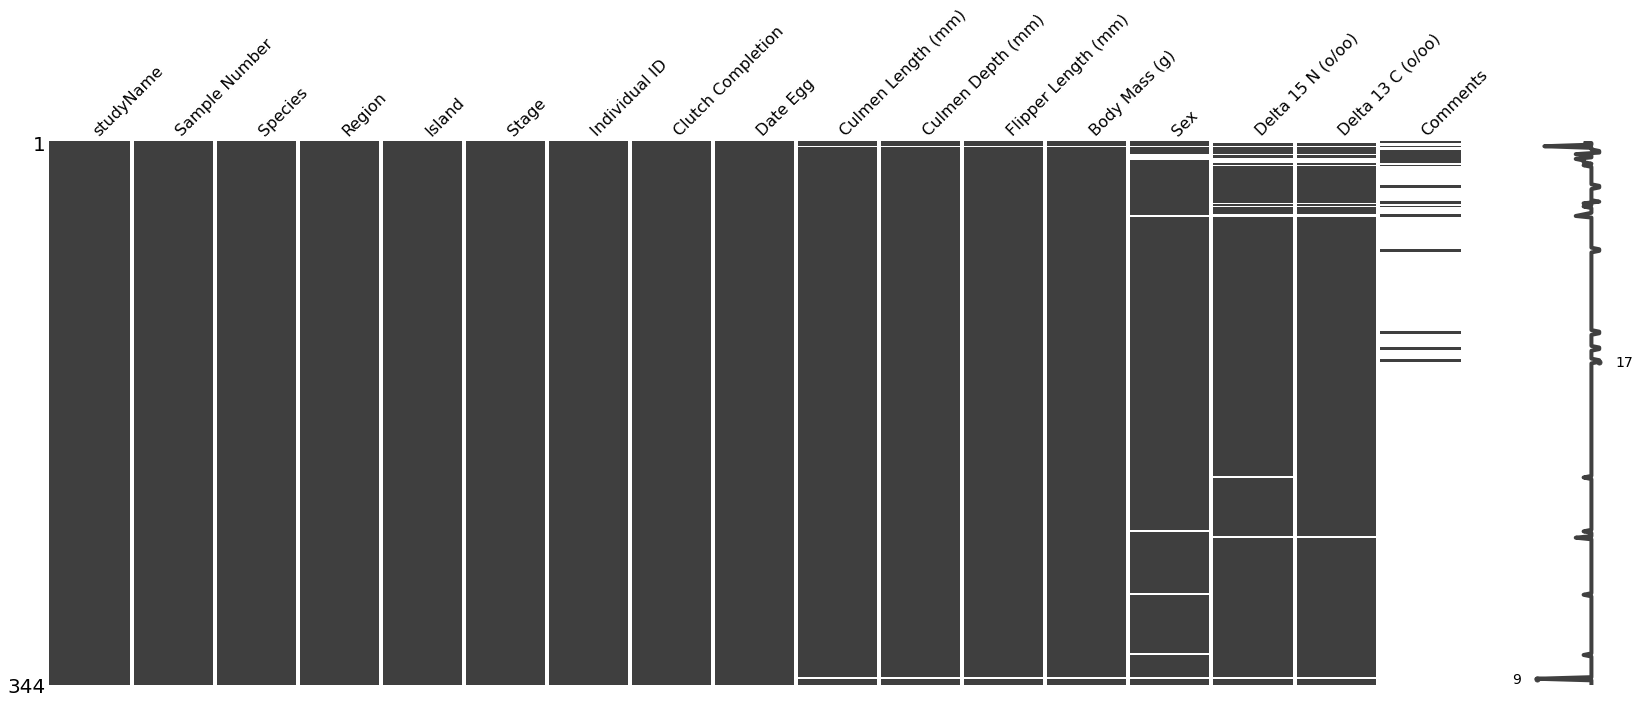

In [9]:
msno.matrix(df);

In [10]:
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [11]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Percentage of missing data is very less. Let's impute it with median in numerical features and mode in categorical feature. Here, I have used .fillna method from pandas library.

Missing values can also be filled using pre-defined functions like SimpleImputer from sklearn.

### Dealing with Categorical Variables

In [12]:
df.Species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [13]:
df.Island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

In [14]:
df.Sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

Where is this '.'

In [15]:
df[df['Sex']=='.']

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
336,PAL0910,117,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,12/1/09,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,NaN


In [16]:
df['Sex'].fillna(df['Sex'].mode()[0],inplace=True)
col_to_be_imputed = ['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
for item in col_to_be_imputed:
    df[item].fillna(df[item].mean(),inplace=True)

In [17]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64

#### Assuming that the penguin is Male

In [18]:
df.loc[336,'Sex'] = 'Male'


## Data Pre-processing

In [19]:
df.drop(columns=['Comments','Delta 15 N (o/oo)','Delta 13 C (o/oo)',
                 'Date Egg','Individual ID','Stage','Region'],axis=1,inplace=True)

In [20]:
for i in range(len(df['Species'])):
    if df['Species'][i] =='Adelie Penguin (Pygoscelis adeliae)':
        df['Species'][i]=0
    elif df['Species'][i] =='Chinstrap penguin (Pygoscelis antarctica)':
        df['Species'][i]=1
    else:
        df['Species'][i]=2
df

C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\4034528913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][i]=0
C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\4034528913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][i]=1
C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\4034528913.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][i]=2


,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,0,Torgersen,Yes,39.10000,18.70000,181.000000,3750.000000,MALE
1,PAL0708,2,0,Torgersen,Yes,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,PAL0708,3,0,Torgersen,Yes,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,PAL0708,4,0,Torgersen,Yes,43.92193,17.15117,200.915205,4201.754386,MALE
4,PAL0708,5,0,Torgersen,Yes,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,2,Biscoe,No,43.92193,17.15117,200.915205,4201.754386,MALE
340,PAL0910,121,2,Biscoe,Yes,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,PAL0910,122,2,Biscoe,Yes,50.40000,15.70000,222.000000,5750.000000,MALE
342,PAL0910,123,2,Biscoe,Yes,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [21]:
for i in range(len(df['Island'])):
    if df['Island'][i] =='Torgersen':
        df['Island'][i]=0
    elif df['Island'][i] =='Biscoe':
        df['Island'][i]=1
    else:
        df['Island'][i]=2
df

C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\3419763236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Island'][i]=0
C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\3419763236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Island'][i]=1
C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\3419763236.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Island'][i]=2


,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,0,0,Yes,39.10000,18.70000,181.000000,3750.000000,MALE
1,PAL0708,2,0,0,Yes,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,PAL0708,3,0,0,Yes,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,PAL0708,4,0,0,Yes,43.92193,17.15117,200.915205,4201.754386,MALE
4,PAL0708,5,0,0,Yes,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,2,1,No,43.92193,17.15117,200.915205,4201.754386,MALE
340,PAL0910,121,2,1,Yes,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,PAL0910,122,2,1,Yes,50.40000,15.70000,222.000000,5750.000000,MALE
342,PAL0910,123,2,1,Yes,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [22]:
df['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
for i in range(len(df['Clutch Completion'])):
    if df['Clutch Completion'][i] =='Yes':
        df['Clutch Completion'][i]=1
    
    else:
        df['Clutch Completion'][i]=0
df

C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\691142347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clutch Completion'][i]=1
C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\691142347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clutch Completion'][i]=0


,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,0,0,1,39.10000,18.70000,181.000000,3750.000000,MALE
1,PAL0708,2,0,0,1,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,PAL0708,3,0,0,1,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,PAL0708,4,0,0,1,43.92193,17.15117,200.915205,4201.754386,MALE
4,PAL0708,5,0,0,1,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,2,1,0,43.92193,17.15117,200.915205,4201.754386,MALE
340,PAL0910,121,2,1,1,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,PAL0910,122,2,1,1,50.40000,15.70000,222.000000,5750.000000,MALE
342,PAL0910,123,2,1,1,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [24]:
df['Sex'].astype(str)
for j,i  in enumerate(df['Sex']):
       
    
    if i == 'FEMALE':
        df['Sex'][j]=0
    elif i=='MALE':
        df['Sex'][j]=1
    
    else:
        df['Sex'][j]=1

C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\4027344410.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][j]=1
C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\4027344410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][j]=0
C:\Users\vatsa\AppData\Local\Temp\ipykernel_6648\4027344410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][j]=1


In [25]:
df= df.dropna().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                344 non-null    int64  
 1   studyName            344 non-null    object 
 2   Sample Number        344 non-null    int64  
 3   Species              344 non-null    object 
 4   Island               344 non-null    object 
 5   Clutch Completion    344 non-null    object 
 6   Culmen Length (mm)   344 non-null    float64
 7   Culmen Depth (mm)    344 non-null    float64
 8   Flipper Length (mm)  344 non-null    float64
 9   Body Mass (g)        344 non-null    float64
 10  Sex                  344 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 29.7+ KB


In [26]:
df1 = df.iloc[:,3:]
df1.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,0,1,39.10000,18.70000,181.000000,3750.000000,1
1,0,0,1,39.50000,17.40000,186.000000,3800.000000,0
2,0,0,1,40.30000,18.00000,195.000000,3250.000000,0
3,0,0,1,43.92193,17.15117,200.915205,4201.754386,1
4,0,0,1,36.70000,19.30000,193.000000,3450.000000,0


In [27]:
# changing all object data types into int64 format
cat_val = ['Species' , 'Island','Clutch Completion' , 'Sex']
from sklearn.preprocessing import LabelEncoder
for i in cat_val:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

In [28]:
df1.dtypes

Species                  int32
Island                   int32
Clutch Completion        int32
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                      int32
dtype: object

In [29]:
y = df1['Sex']
df1.drop(columns = ['Sex'],axis=1,inplace=True)
x = df1
print('Input Data -',x.head())
print('Target Data-',y.head())

Input Data -    Species  Island  Clutch Completion  Culmen Length (mm)  Culmen Depth (mm)  \
0        0       0                  1            39.10000           18.70000   
1        0       0                  1            39.50000           17.40000   
2        0       0                  1            40.30000           18.00000   
3        0       0                  1            43.92193           17.15117   
4        0       0                  1            36.70000           19.30000   

   Flipper Length (mm)  Body Mass (g)  
0           181.000000    3750.000000  
1           186.000000    3800.000000  
2           195.000000    3250.000000  
3           200.915205    4201.754386  
4           193.000000    3450.000000  
Target Data- 0    1
1    0
2    0
3    1
4    0
Name: Sex, dtype: int32


In [30]:
x = x.values
x.shape

(344, 7)

In [31]:
corr = np.corrcoef(x.T)
corr.shape

(7, 7)

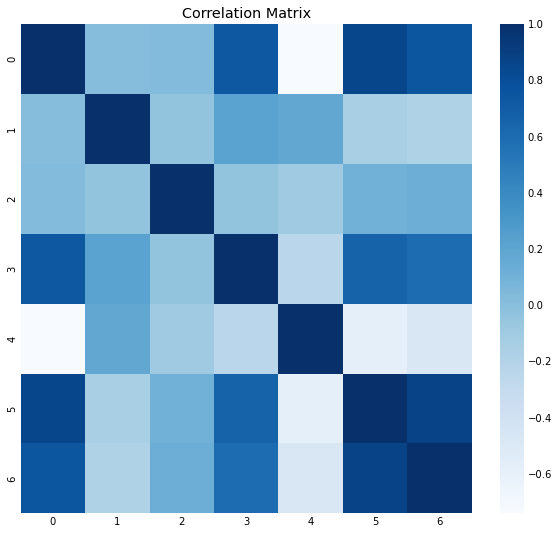

In [32]:
plt.figure(figsize = (9,9))
sns.heatmap(corr,cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

### Conclusion:
This figure shows that  5 & 6 are highly correlated

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=50)

In [34]:
#KNN classification for checking the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
acc = knn.score(X_test,y_test)
print('The accuracy of KNN on the original dataset : {}'.format(acc))

The accuracy of KNN on the original dataset : 0.7596153846153846


In [35]:
# Comparing the result of KNN classifier after LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda2 = LinearDiscriminantAnalysis(n_components = 1) # down scaling the dimension to 1D from original data
lda2.fit(X_train,y_train)
x_train_mod = lda2.transform(X_train)
x_test_mod  = lda2.transform(X_test)

In [36]:
knn.fit(x_train_mod,y_train)
acc = knn.score(x_test_mod,y_test)
print('The accuracy of KNN after LDA on the original dataset : {}'.format(acc))

The accuracy of KNN after LDA on the original dataset : 0.875


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [38]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
}

modelNames = ["GaussianNB", 'BernoulliNB', 'LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 
              'KNeighborsClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 71.73913043478261
Validation score of trained model: 66.66666666666666
Test score of trained model: 78.94736842105263
 
Confussion Matrix: 
[[23  3]
 [ 9 22]]

Accuracy : 0.7894736842105263
Precision: 0.88
Recall   : 0.7096774193548387
F1 score : 0.7857142857142856
Specificity : 0.8846153846153846

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        26
           1       0.88      0.71      0.79        31

    accuracy                           0.79        57
   macro avg       0.80      0.80      0.79        57
weighted avg       0.81      0.79      0.79        57



############################################################################



BernoulliNB
Train score of trained model: 54.78260869565217
Validation score of trained model: 50.877192982456144
Test score of trained model: 42.10526315789473
 
Confussion Matrix: 
[[ 1  2]
 [31 23]]

Accuracy : 0.4210526315

C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier
Train score of trained model: 100.0
Validation score of trained model: 80.7017543859649
Test score of trained model: 92.98245614035088
 
Confussion Matrix: 
[[30  2]
 [ 2 23]]

Accuracy : 0.9298245614035088
Precision: 0.92
Recall   : 0.92
F1 score : 0.92
Specificity : 0.9375

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.92      0.92      0.92        25

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



############################################################################



DecisionTreeClassifier
Train score of trained model: 100.0
Validation score of trained model: 73.68421052631578
Test score of trained model: 77.19298245614034
 
Confussion Matrix: 
[[24  5]
 [ 8 20]]

Accuracy : 0.7719298245614035
Precision: 0.8
Recall   : 0.71428571

`Question 1` Build a classifier model to predict the gender of the penguin. For this you have to run all the classifier algorithms covered in class and evaluate the performance of each one of them. Out of these classifiers algorithms, you must then select one which has the best predictive power.

## Conclusion:
##### The best classifier for this data set is `Random Forest` is the best method of classifer as it gives highest accuracy, Precision, Recall, F1 score and Specificity.

ROC CURVE


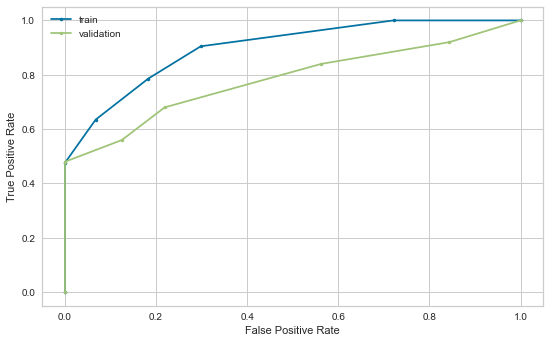

In [55]:
print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Clustering

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = scaler.fit_transform(df.loc[:,["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"]])
cluster_dfsc = pd.DataFrame(scale, columns = ["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"]);
cluster_dfsc.head(5)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.429888,0.482282,0.490088,0.417154
4,0.167273,0.738095,0.355932,0.208333


In [40]:
from sklearn.cluster import KMeans

In [41]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(cluster_dfsc)
    wcss.append(kmeans.inertia_)

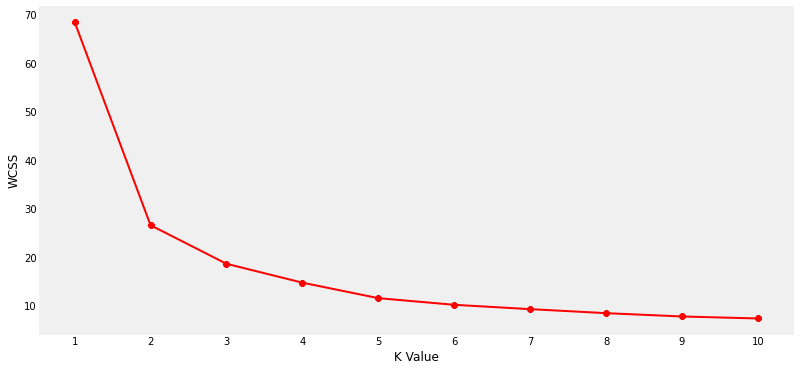

In [42]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

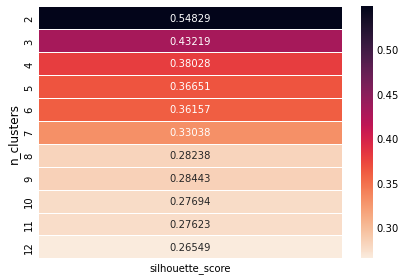

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,13)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters=c, max_iter=500, n_init=20, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_dfsc)
    silhouette_avg = silhouette_score(cluster_dfsc, cluster_labels)          
    results.append([c,silhouette_avg]) 
                                      
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index = "n_clusters", values = "silhouette_score")
                                      
plt.figure()
sns.heatmap(pivot_km, annot = True, linewidths = .5, fmt = '3.5', cmap = sns.cm.rocket_r)
plt.tight_layout()

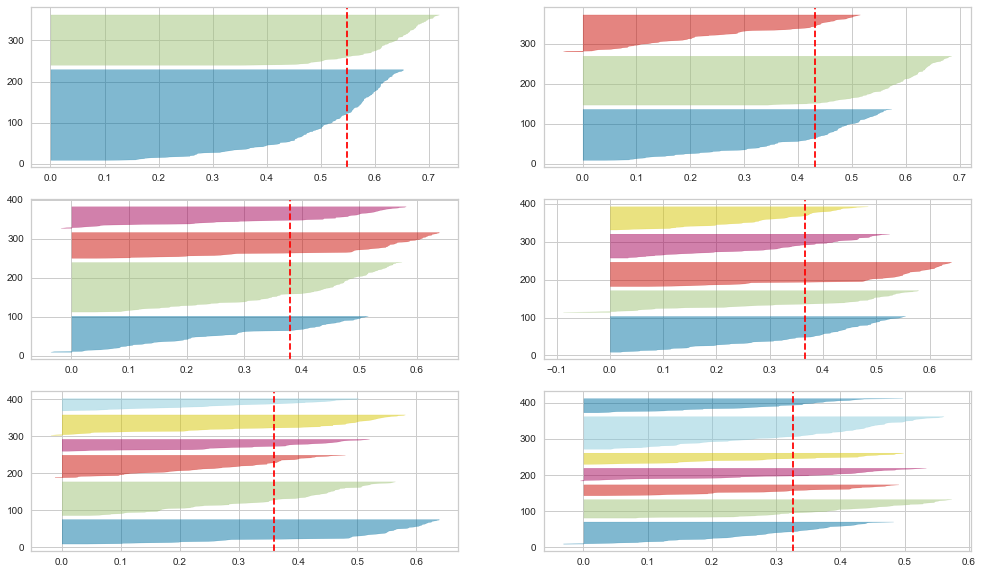

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 2, figsize=(15,10))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(cluster_dfsc) 

## Conclusion 
The Image 4  whose mean is 0.375 is the best

In [45]:
km = KMeans(n_clusters=6)

clusters = km.fit_predict(scale)
clusters

array([4, 4, 4, 2, 1, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1, 1, 4, 5, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1,
       4, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 5, 4, 1,
       4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 2, 5,
       5, 2, 5, 2, 2, 2, 5, 5, 2, 5, 2, 5, 2, 5, 5, 2, 2, 5, 4, 2, 4, 5,
       2, 5, 2, 5, 2, 5, 4, 5, 4, 5, 2, 2, 2, 5, 2, 5, 5, 2, 5, 2, 2, 5,
       2, 5, 2, 2, 2, 5, 2, 5, 4, 5, 2, 5, 5, 2, 5, 2, 2, 5, 2, 2, 5, 5,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0,
       0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0,

In [46]:
## Assign cluster membership to as variable to Dataset
df["km_label3"] = clusters
df.head()

,index,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,km_label3
0,0,PAL0708,1,0,0,1,39.10000,18.70000,181.000000,3750.000000,1,4
1,1,PAL0708,2,0,0,1,39.50000,17.40000,186.000000,3800.000000,0,4
2,2,PAL0708,3,0,0,1,40.30000,18.00000,195.000000,3250.000000,0,4
3,3,PAL0708,4,0,0,1,43.92193,17.15117,200.915205,4201.754386,1,2
4,4,PAL0708,5,0,0,1,36.70000,19.30000,193.000000,3450.000000,0,1


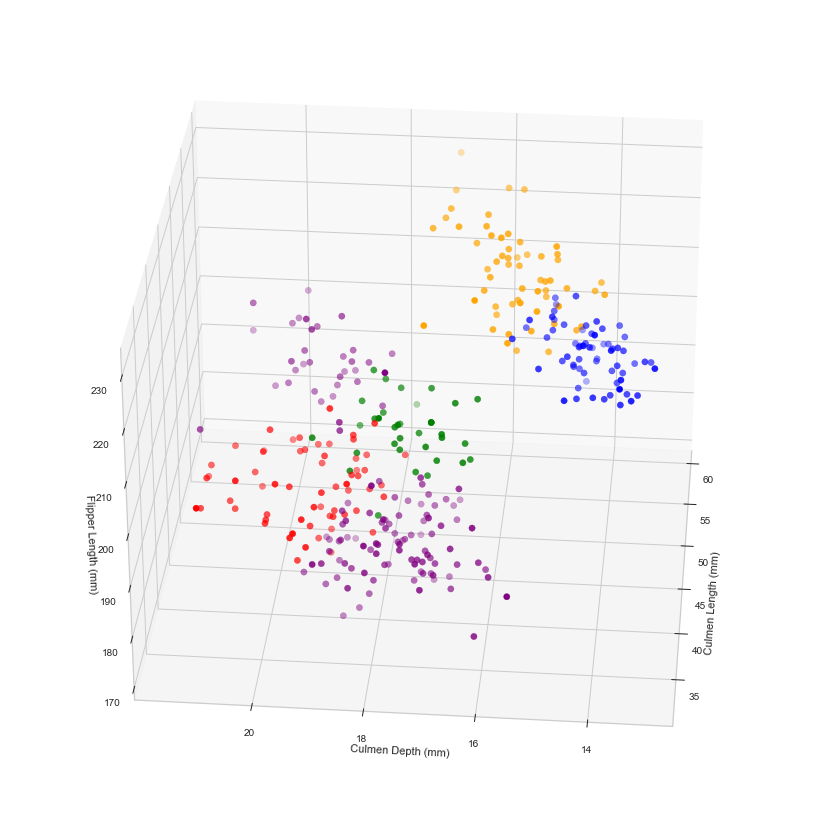

In [47]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Culmen Length (mm)"][df.km_label3 == 0], df["Culmen Depth (mm)"][df.km_label3 == 0],df["Flipper Length (mm)"][df.km_label3 == 0],c='blue', s=40)
ax.scatter(df["Culmen Length (mm)"][df.km_label3 == 1], df["Culmen Depth (mm)"][df.km_label3 == 1],df["Flipper Length (mm)"][df.km_label3 == 1],c='red', s=40)
ax.scatter(df["Culmen Length (mm)"][df.km_label3 == 2], df["Culmen Depth (mm)"][df.km_label3 == 2],df["Flipper Length (mm)"][df.km_label3 == 2],c='green', s=40)
ax.scatter(df["Culmen Length (mm)"][df.km_label3 == 3], df["Culmen Depth (mm)"][df.km_label3 == 3],df["Flipper Length (mm)"][df.km_label3 == 3],c='orange', s=40)
ax.scatter(df["Culmen Length (mm)"][df.km_label3 == 4], df["Culmen Depth (mm)"][df.km_label3 == 4],df["Flipper Length (mm)"][df.km_label3 == 4],c='purple', s=40)
ax.scatter(df["Culmen Length (mm)"][df.km_label3 == 5], df["Culmen Depth (mm)"][df.km_label3 == 5],df["Flipper Length (mm)"][df.km_label3 == 5],c='purple', s=40)


ax.view_init(30, 185)

ax.set_xlabel("Culmen Length (mm)")
ax.set_ylabel("Culmen Depth (mm)")
ax.set_zlabel("Flipper Length (mm)")
plt.show()

## Clusters with Dendrogram

In [48]:
import scipy.cluster.hierarchy as sch

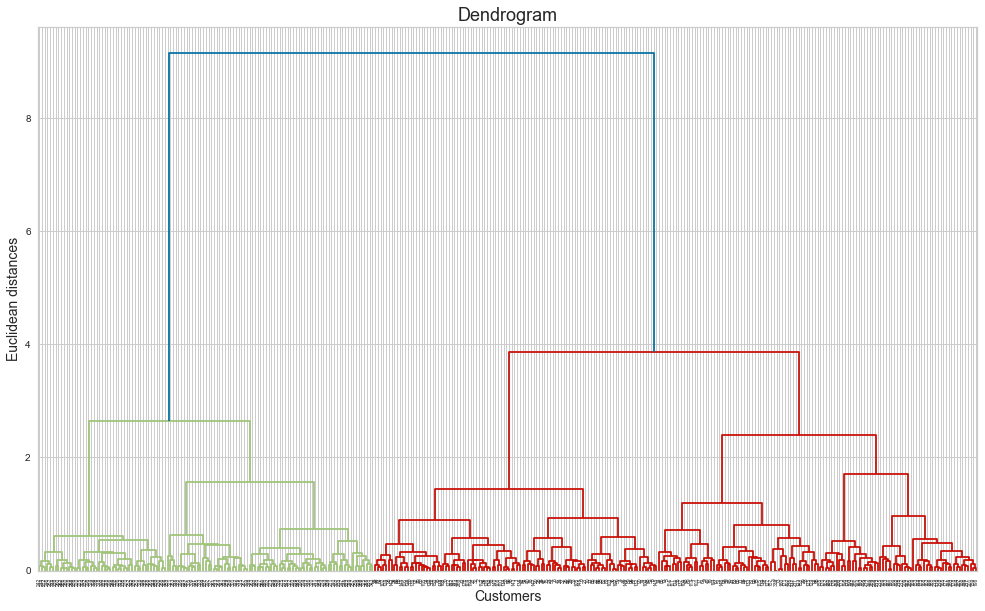

In [49]:
fig, ax = plt.subplots(figsize = (15,10))

dendrogram = sch.dendrogram(sch.linkage(scale, method = 'ward')) # finding the optimal number of clusters using dendrogram

ax.set_title('Dendrogram', fontsize=18) # title of the dendrogram
ax.set_xlabel('Customers', fontsize=14) # label of the x-axis
ax.set_ylabel('Euclidean distances', fontsize=14) # label of the y-axis
plt.show()

## Hierarchical Clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
Agg_hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')

In [52]:
y_hc = Agg_hc.fit_predict(scale) # model fitting on the dataset
y_hc

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 5, 4,
       4, 5, 4, 1, 5, 4, 1, 4, 5, 4, 5, 4, 5, 4, 4, 4, 5, 1, 2, 5, 5, 4,
       5, 4, 4, 4, 5, 4, 2, 4, 2, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 1,
       5, 4, 5, 4, 5, 4, 5, 4, 2, 4, 5, 4, 4, 1, 4, 5, 5, 4, 1, 4, 4, 4,
       3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3,

In [53]:
df["hc_label"] = y_hc
df.head()

,index,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,km_label3,hc_label
0,0,PAL0708,1,0,0,1,39.10000,18.70000,181.000000,3750.000000,1,4,2
1,1,PAL0708,2,0,0,1,39.50000,17.40000,186.000000,3800.000000,0,4,2
2,2,PAL0708,3,0,0,1,40.30000,18.00000,195.000000,3250.000000,0,4,2
3,3,PAL0708,4,0,0,1,43.92193,17.15117,200.915205,4201.754386,1,2,1
4,4,PAL0708,5,0,0,1,36.70000,19.30000,193.000000,3450.000000,0,1,2


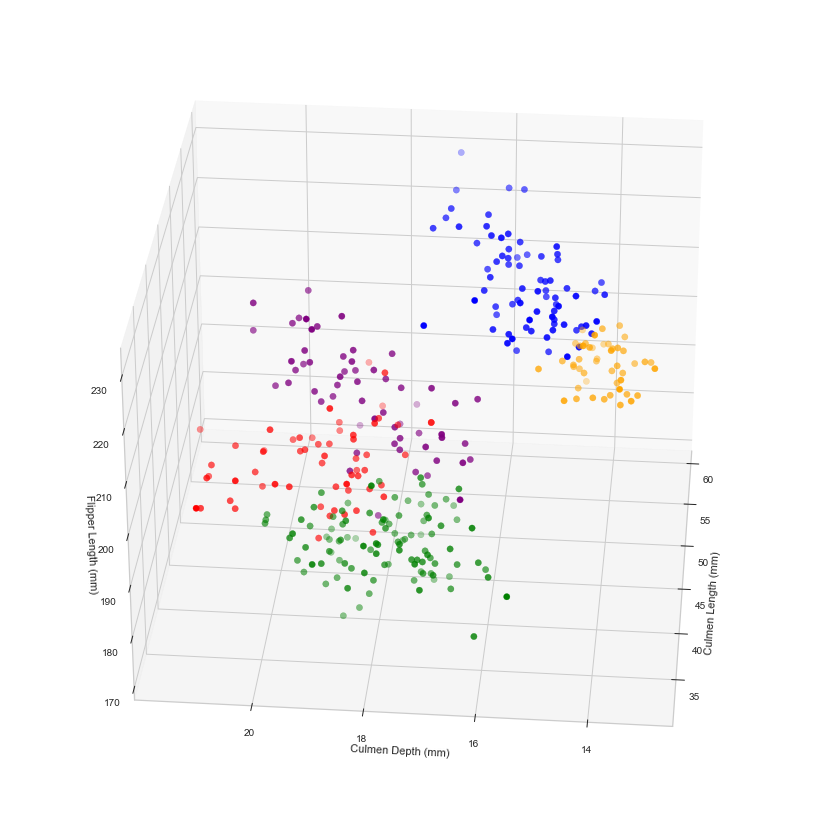

In [54]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Culmen Length (mm)"][df.hc_label == 0], df["Culmen Depth (mm)"][df.hc_label == 0],df["Flipper Length (mm)"][df.hc_label == 0],c='blue', s=40)
ax.scatter(df["Culmen Length (mm)"][df.hc_label == 1], df["Culmen Depth (mm)"][df.hc_label == 1],df["Flipper Length (mm)"][df.hc_label == 1],c='red', s=40)
ax.scatter(df["Culmen Length (mm)"][df.hc_label == 2], df["Culmen Depth (mm)"][df.hc_label == 2],df["Flipper Length (mm)"][df.hc_label == 2],c='green', s=40)
ax.scatter(df["Culmen Length (mm)"][df.hc_label == 3], df["Culmen Depth (mm)"][df.hc_label == 3],df["Flipper Length (mm)"][df.hc_label == 3],c='orange', s=40)
ax.scatter(df["Culmen Length (mm)"][df.hc_label == 4], df["Culmen Depth (mm)"][df.hc_label == 4],df["Flipper Length (mm)"][df.hc_label == 4],c='purple', s=40)
ax.scatter(df["Culmen Length (mm)"][df.hc_label == 5], df["Culmen Depth (mm)"][df.hc_label == 5],df["Flipper Length (mm)"][df.hc_label == 5],c='purple', s=40)


ax.view_init(30, 185)

ax.set_xlabel("Culmen Length (mm)")
ax.set_ylabel("Culmen Depth (mm)")
ax.set_zlabel("Flipper Length (mm)")
plt.show()

In [57]:
df1 = df.copy()

CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH


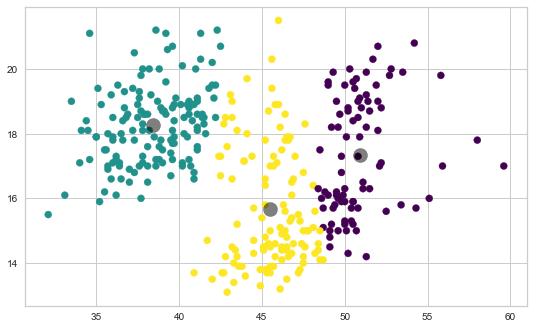

In [59]:
print('CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH')
X = df1[['Culmen Length (mm)','Culmen Depth (mm)']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'Culmen Length (mm)'], X.loc[:, 'Culmen Depth (mm)'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH


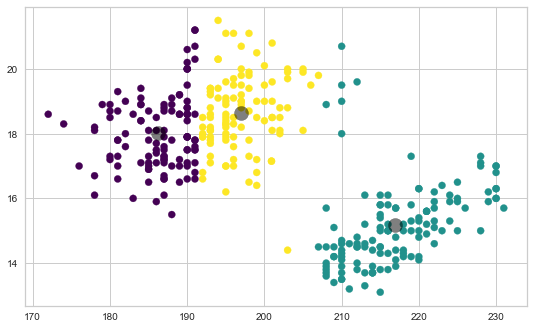

In [61]:
print('CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH')
X = df1[['Flipper Length (mm)','Culmen Depth (mm)']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'Flipper Length (mm)'], X.loc[:, 'Culmen Depth (mm)'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

CLUSTERING ON FLIPPER LENGTH AND BODY MASS


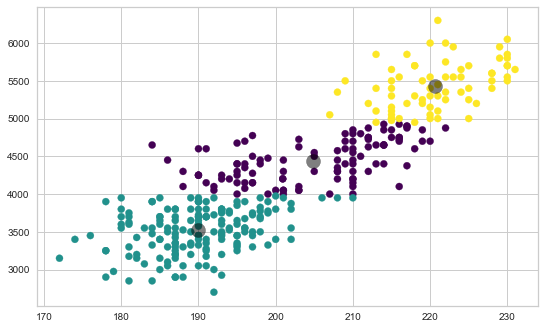

In [63]:
print('CLUSTERING ON FLIPPER LENGTH AND BODY MASS')
X = df1[['Flipper Length (mm)','Body Mass (g)']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'Flipper Length (mm)'], X.loc[:, 'Body Mass (g)'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## Thank you